## General

In [1]:
# evaluate all lines in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import datetime
# TODAY = datetime.datetime.today()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special,optimize

In [3]:
zs = np.linspace(0.0,2.0,100)
zs

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [4]:
def ΗfunctionLCDM(z,y):
    omegam = y[0]
    h = y[1]
    E = (omegam*((1+z)**3)+(1-omegam))**0.5
    return 100*h*E

In [5]:
ΗfunctionLCDM(zs,[0.3,0.7])

array([ 70.        ,  70.64632224,  71.31253777,  71.99859939,
        72.70444537,  73.43000035,  74.17517616,  74.93987267,
        75.72397867,  76.52737267,  77.34992373,  78.19149228,
        79.05193091,  79.93108511,  80.82879402,  81.74489116,
        82.67920506,  83.63155994,  84.60177632,  85.5896716 ,
        86.59506062,  87.61775614,  88.65756938,  89.71431043,
        90.78778868,  91.8778132 ,  92.98419314,  94.106738  ,
        95.24525799,  96.39956426,  97.56946919,  98.7547866 ,
        99.95533193, 101.17092248, 102.40137751, 103.64651845,
       104.90616894, 106.18015505, 107.46830527, 108.77045066,
       110.08642487, 111.41606425, 112.75920783, 114.11569742,
       115.48537755, 116.86809558, 118.26370166, 119.67204869,
       121.09299242, 122.52639134, 123.97210671, 125.43000252,
       126.89994551, 128.38180506, 129.87545326, 131.38076476,
       132.89761686, 134.42588934, 135.96546455, 137.51622726,
       139.07806467, 140.65086636, 142.23452425, 143.82

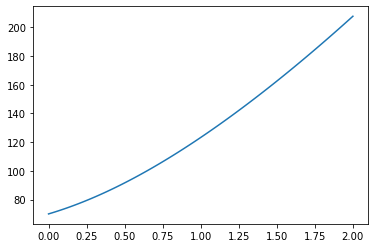

In [6]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))

In [89]:
def Ηfunction(z,y,equationE):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    global  Om_m0, a, h
    a = y[2]
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+ z)**4. + Om_l)**0.5
    res = optimize.newton(equationE, x0E, args = (z,)) 
    return H_0*res

array([0.7       , 0.6872504 , 0.67446953, 0.66167698, 0.64889165,
       0.63613173, 0.62341457, 0.61075667, 0.59817364, 0.58568016,
       0.57328997, 0.56101583, 0.54886957, 0.53686205, 0.52500317,
       0.51330191, 0.50176635, 0.49040369, 0.47922024, 0.46822155,
       0.45741234, 0.44679661, 0.43637763, 0.42615803, 0.41613979,
       0.40632432, 0.39671248, 0.38730462, 0.37810062, 0.36909994,
       0.36030164, 0.35170441, 0.34330663, 0.33510638, 0.32710149,
       0.31928953, 0.31166789, 0.30423376, 0.29698418, 0.28991605,
       0.28302616, 0.2763112 , 0.26976779, 0.26339246, 0.25718174,
       0.25113208, 0.24523993, 0.23950174, 0.23391394, 0.22847297,
       0.22317532, 0.21801745, 0.2129959 , 0.20810723, 0.20334803,
       0.19871495, 0.1942047 , 0.18981402, 0.18553972, 0.18137867,
       0.17732781, 0.17338411, 0.16954464, 0.16580652, 0.16216693,
       0.15862312, 0.15517241, 0.15181219, 0.14853989, 0.14535303,
       0.14224919, 0.13922601, 0.13628119, 0.1334125 , 0.13061

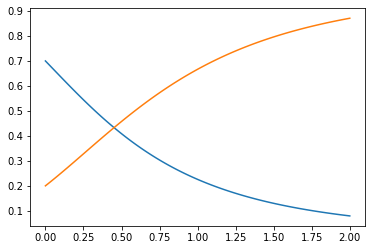

In [94]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.2
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

# Model 1

In [43]:
equation_E1 = lambda E,z: Ε**2 + Ε**(2*a)*(-1 + (Om_m0)) - (1 + z)**3*(Om_m0)

In [115]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E1))

70.0


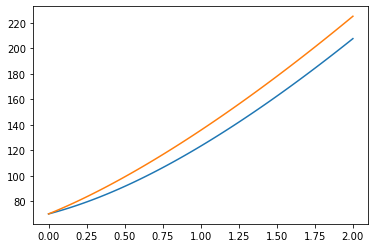

In [117]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E1))

C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


array([ 7.00000000e-01,  6.64358995e-01,  6.16202998e-01,  4.31765819e-01,
        4.02445562e-01,  2.89163802e-01, -2.27060998e+00,  4.71422374e-01,
        3.70114088e-01,  9.76766866e-01, -1.21816352e+05,  1.63487215e-02,
        6.58528773e-01, -1.23653785e+03,  2.71258961e-01,  6.03753303e-01,
       -9.28465933e-01,  9.99252970e-01, -1.74864296e+03, -1.06745497e+03,
       -1.51794326e+02, -1.93828776e-01, -3.90396581e+02, -4.22112534e+02,
       -1.62058604e+03, -7.59881477e+02, -7.10544013e+02, -6.58308089e+02,
       -6.38693034e+02, -6.02977174e+02, -7.06241244e+02, -1.23439758e+04,
       -3.60733767e+03, -2.65864744e+03, -1.99326747e+03, -8.63676200e+02,
       -7.15119189e+02, -5.36626148e+02, -3.88645914e+00, -3.85851093e+02,
        9.94678079e-01, -3.82191791e+02, -8.75463264e+02, -2.92475081e+02,
       -3.41168673e+02, -3.33578013e+02, -2.99422725e+02, -2.85084608e+02,
        9.63560592e-01,  9.80863661e-01,  9.83655059e-01,  9.84393403e-01,
        9.84668380e-01,  

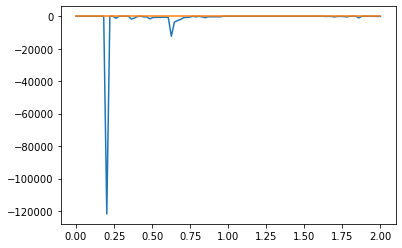

In [146]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1,-10],equation_E1))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-10],equation_E1)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 2

In [8]:
def Ηfunctionexp1(z,y):
    '''
    f(Q) = Qexp(lmbd*Q_0/Q)
    '''
    Om_m0 = y[0]
    h = y[1]
    T_cmb = 2.7255
    Omr = Om_m0/(1. + 2.5e4 * Om_m0 * h**2. * (T_cmb/2.7)**(-4.))
    expr = (Om_m0 + Omr)/(-2*np.exp(0.5))
    a = (0.5 + special.lambertw(expr,k=0)).real
    H_0 = 100*h
    T_cmb = 2.7255
    Om_r = Om_m0/(1. + 2.5e4 * Om_m0* h**2. * (T_cmb/2.7)**(-4.))
    Og_mod = 31500. * (T_cmb/2.7)**(-4.)
    Om_l = 1. - Om_m0- Om_r
    x0E = (Om_m0*(1.+z)**3. + Om_r*(1.+z)**4. + Om_l)**0.5
    equation_E = lambda E: (E**2.- 2*a)* np.exp(a*1./E**2)- Om_m0*(1.+z)**3- Om_r*(1.+z)**4
    res = optimize.newton(equation_E, x0E) 
    return H_0*res

In [17]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunctionexp1(0,[0.3,0.7]))

70.0


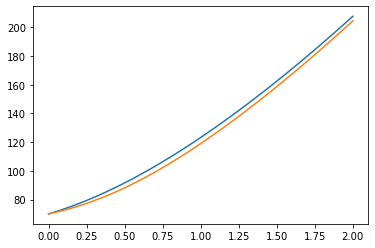

In [10]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunctionexp1(zs,[0.3,0.7]))

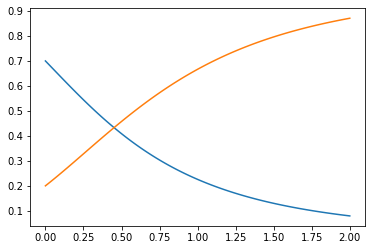

In [22]:
# fish plot for LCDM 
# \Omega_{\Lambda} = E**2 -Omega_{m0} (1+z)**3
omegam = 0.2
h = 0.6
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/ΗfunctionLCDM(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((ΗfunctionLCDM(zs,[omegam,h])/(100*h))**2))
# intersection point(transition redshift), to the left accelarated, to the right disaccelerated 

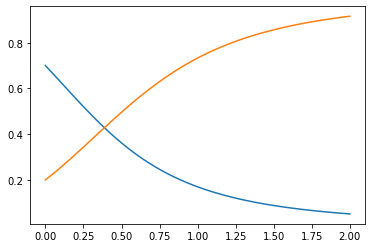

In [23]:
# fish plot for exp1 
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunctionexp1(zs,[omegam,h]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunctionexp1(zs,[omegam,h])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 3

In [131]:
equation_E3 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - E**2*(1 + np.exp(1)**((E**2*(-1 + 2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))/2)*(-1 + E**2 - 2*E**2*special.lambertw((np.sqrt(np.exp(1))*(Om_m0))/2).real))

In [132]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E3))

70.0


C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:445: RuntimeWarning: RMS of 590.685 reached
  warnings.warn(


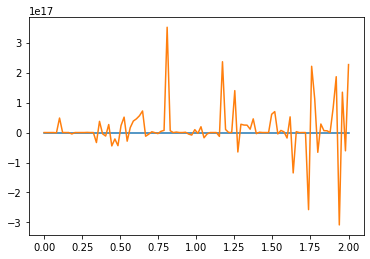

In [133]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,-0.5],equation_E3))

C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:445: RuntimeWarning: RMS of 590.685 reached
  warnings.warn(


array([0.7       , 0.64766996, 0.55914107, 0.99891664, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99980195, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999945,
       0.99997611, 0.99987715, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:445: RuntimeWarning: RMS of 406.899 reached
  warnings.warn(


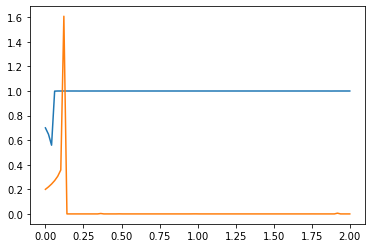

In [134]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1,-0.5],equation_E3))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-0.5],equation_E3)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 4

In [139]:
equation_E4 = lambda E,z: E**2 - (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
    h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
       0.6065306597126335*(Om_m0)))*
    (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
       (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*
    (np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (-0.3000919999999996 + 0.9999999999999998*E**2) + 
     np.exp(1)**((E**2*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      (0.9999999999999998 - 1.9999999999999996*a - 0.9999999999999998*E**2 + 
       1.9999999999999996*a*E**2)) + 
   (100**(2.7755575615628914*(10**-17)*np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))*
      np.exp(1)**(((-1 + E**2)*(1 - 2*a + 2*special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real))/2)*
      h**(np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*(-0.18201499873448362 + 
         0.6065306597126335*(Om_m0)))*
      (h*E)**(2*a + np.exp(1)**(a - special.lambertw((np.exp(1)**(-1/2 + a)*(-1 + (Om_m0)))/2).real)*
         (0.18201499873448365 - 0.6065306597126335*(Om_m0)))*(0.9999999999999998 - 
       0.9999999999999998*E**2) + 1.*h**(2*a)*(1. + 1.*z)**3)*(Om_m0))/h**(2*a)
# fix friedmann

In [140]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_E4))

69.99932012446848


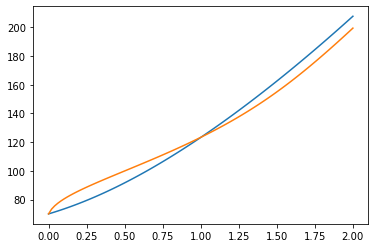

In [143]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_E4))

array([0.69979565, 0.70978296, 0.71019945, 0.70716652, 0.70227583,
       0.69619611, 0.68927417, 0.68171396, 0.67364616, 0.66516004,
       0.65631971, 0.64717319, 0.63775773, 0.62810316, 0.61823401,
       0.60817096, 0.59793187, 0.58753244, 0.57698673, 0.56630757,
       0.5555068 , 0.54459549, 0.53358415, 0.52248278, 0.51130104,
       0.5000483 , 0.48873372, 0.47736629, 0.46595487, 0.45450823,
       0.44303511, 0.43154417, 0.42004409, 0.40854355, 0.39705123,
       0.38557583, 0.37412612, 0.36271088, 0.35133894, 0.34001919,
       0.32876056, 0.31757204, 0.30646267, 0.29544153, 0.28451774,
       0.27370048, 0.26299892, 0.25242227, 0.24197976, 0.23168059,
       0.22153393, 0.21154895, 0.20173471, 0.19210021, 0.18265434,
       0.17340582, 0.16436324, 0.15553493, 0.14692901, 0.13855328,
       0.13041521, 0.1225219 , 0.11487998, 0.1074956 , 0.10037436,
       0.09352126, 0.0869406 , 0.08063597, 0.0746102 , 0.06886522,
       0.06340212, 0.05822102, 0.05332108, 0.04870045, 0.04435

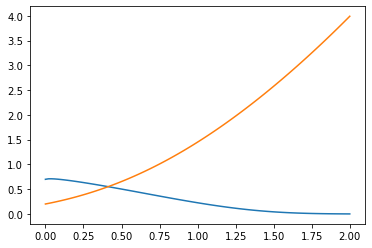

In [145]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1,-1],equation_E4))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,-1],equation_E4)/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 5

In [87]:
equation_E5 = lambda E,z: -E + E**2 - (-E + (1 + z)**3)*(Om_m0)

In [100]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_list[4]))

70.0


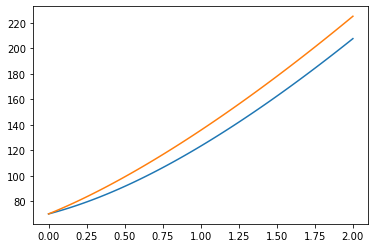

In [101]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,1],equation_list[4]))

array([0.7       , 0.69025555, 0.6806075 , 0.67106248, 0.66162636,
       0.6523042 , 0.64310039, 0.63401864, 0.62506206, 0.61623322,
       0.60753415, 0.59896645, 0.59053128, 0.58222939, 0.57406122,
       0.56602688, 0.55812618, 0.5503587 , 0.54272379, 0.53522058,
       0.52784803, 0.52060496, 0.51349003, 0.5065018 , 0.49963869,
       0.49289908, 0.48628123, 0.47978336, 0.47340363, 0.46714017,
       0.46099106, 0.45495436, 0.4490281 , 0.44321033, 0.43749906,
       0.43189232, 0.42638813, 0.42098453, 0.41567956, 0.41047129,
       0.40535779, 0.40033716, 0.39540753, 0.39056703, 0.38581384,
       0.38114616, 0.3765622 , 0.37206022, 0.36763851, 0.36329537,
       0.35902916, 0.35483825, 0.35072104, 0.34667596, 0.3427015 ,
       0.33879615, 0.33495843, 0.33118692, 0.3274802 , 0.3238369 ,
       0.32025567, 0.31673519, 0.31327418, 0.30987137, 0.30652553,
       0.30323547, 0.3       , 0.29681798, 0.29368828, 0.29060981,
       0.2875815 , 0.2846023 , 0.28167119, 0.27878718, 0.27594

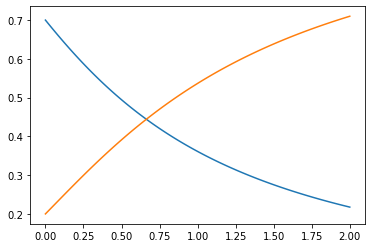

In [102]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,1],equation_list[4]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,1],equation_list[4])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 6

In [104]:
equation_E6 = lambda E,z: E**2 - (1 + z)**3*(Om_m0) - (E**(-2 + 2*a)*(-1 + (Om_m0))*(-2*(1/(np.cosh(E**(-2))))**2 + (-1 + 2*a)*E**2*np.tanh(E**(-2))))/(2*(1/(np.cosh(1)))**2 + np.tanh(1) - 2*a*np.tanh(1))

In [107]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_list[5]))

70.0


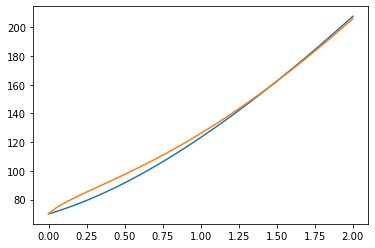

In [109]:
plt.plot(zs,ΗfunctionLCDM(zs,[0.3,0.7]))
plt.plot(zs,Ηfunction(zs,[0.3,0.7,0.5],equation_list[5]))

array([0.7       , 0.69845543, 0.6938855 , 0.68773315, 0.68058677,
       0.67274946, 0.66440026, 0.65565522, 0.646595  , 0.63727883,
       0.62775221, 0.6180514 , 0.60820631, 0.5982422 , 0.58818096,
       0.57804193, 0.56784242, 0.55759819, 0.54732372, 0.53703242,
       0.52673683, 0.51644869, 0.50617908, 0.49593848, 0.48573682,
       0.47558349, 0.46548744, 0.45545712, 0.44550058, 0.43562542,
       0.42583883, 0.41614761, 0.40655815, 0.39707644, 0.3877081 ,
       0.37845836, 0.36933205, 0.36033367, 0.3514673 , 0.34273671,
       0.33414526, 0.32569599, 0.31739159, 0.3092344 , 0.30122646,
       0.29336944, 0.28566476, 0.27811348, 0.27071641, 0.26347407,
       0.25638669, 0.24945428, 0.24267659, 0.23605312, 0.22958317,
       0.22326584, 0.21710001, 0.21108441, 0.20521757, 0.19949789,
       0.19392361, 0.18849284, 0.18320359, 0.17805374, 0.17304107,
       0.16816329, 0.16341803, 0.15880286, 0.15431528, 0.14995275,
       0.1457127 , 0.14159252, 0.13758958, 0.13370125, 0.12992

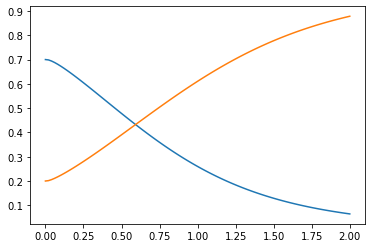

In [110]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,0.5],equation_list[5]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,0.5],equation_list[5])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 

# Model 7

In [96]:
equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)

In [111]:
# Ηfunctionexp1(zs,[0.3,0.7])
print(Ηfunction(0,[0.3,0.7,-0.5],equation_list[6]))

70.0


C:\Users\VIKTOR~1\AppData\Local\Temp/ipykernel_15012/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


array([ 7.00000000e-01,  6.72710583e-01,  6.40485141e-01,  5.99015894e-01,
        5.05227402e-01, -2.14527630e+00,  5.31629233e-01, -1.50848972e-01,
       -2.49368691e+03,  3.47702826e-01, -2.51620772e+01,  6.31404684e-01,
                   nan,  4.78342911e-01,             nan, -2.20574868e+00,
       -2.55802973e+01, -4.73009753e+00, -3.17549055e+01,             nan,
       -1.95225515e+02,             nan,  9.51483961e-01,  4.24530759e-01,
       -1.67984222e+01, -3.55817717e+01, -5.40374084e+02, -2.52975019e+01,
       -1.28450549e+01, -1.15088941e+01, -1.05702212e+01, -9.55834430e+00,
       -8.31318111e+00, -1.81487551e+00, -2.26272074e+00,             nan,
       -3.15650937e+00, -7.83326970e+01, -9.18964946e+01, -1.59445317e+01,
       -8.09405316e+00, -5.49565844e+00, -3.61448152e+00, -2.87056362e+00,
       -1.67396619e+00, -3.56601303e+00, -1.08751852e+02, -7.82720251e+01,
        8.31065807e-01, -7.90720499e+00,             nan,  7.94616086e-01,
       -2.45723190e-01, -

C:\Users\VIKTOR~1\AppData\Local\Temp/ipykernel_15012/2306859768.py:1: RuntimeWarning: overflow encountered in power
  equation_E7 = lambda E,z: E**2 + (np.exp(1)**(-1 + E**2)*(1 - E**2 + 2*E**4)*(-1 + (Om_m0)))/2 - (1 + z)**3*(Om_m0)
C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:419: RuntimeWarning: invalid value encountered in true_divide
  dp = (q1 * (p1 - p))[nz_der] / (q1 - q0)[nz_der]
C:\Users\Viktor G\.conda\envs\jupyterlab\lib\site-packages\scipy\optimize\zeros.py:459: RuntimeWarning: some failed to converge after 50 iterations
  warnings.warn(msg, RuntimeWarning)


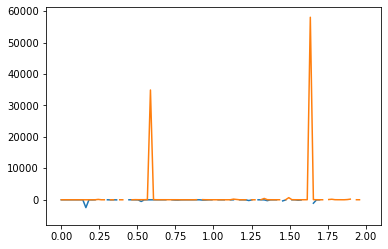

In [114]:
# fish plot for Ηfunction
def omegalamda(zs,omegam,h):
      return 1 - ((100*h)/Ηfunction(zs,[omegam,h,0.5],equation_list[6]))**2*omegam*((1+zs)**3)
omegalamda(zs,0.3,0.7)
plt.plot(zs,omegalamda(zs,0.3,0.7))
plt.plot(zs,((omegam)*((1+zs)**3))/((Ηfunction(zs,[omegam,h,0.5],equation_list[6])/(100*h))**2))
# intersection point, to the left accelarated, to the right disaccelerated 